In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/samples.zip

Streaming output truncated to the last 5000 lines.
  inflating: samples/X/1002.png      
  inflating: samples/X/1003.png      
  inflating: samples/X/1004.png      
  inflating: samples/X/1005.png      
  inflating: samples/X/1006.png      
  inflating: samples/X/1007.png      
  inflating: samples/X/1008.png      
  inflating: samples/X/1009.png      
  inflating: samples/X/1010.png      
  inflating: samples/X/1011.png      
  inflating: samples/X/1012.png      
  inflating: samples/X/1013.png      
  inflating: samples/X/1014.png      
  inflating: samples/X/1015.png      
  inflating: samples/X/1016.png      
  inflating: samples/X/1017.png      
  inflating: samples/X/1018.png      
  inflating: samples/X/1019.png      
  inflating: samples/X/1020.png      
  inflating: samples/X/1021.png      
  inflating: samples/X/1022.png      
  inflating: samples/X/1023.png      
  inflating: samples/X/1024.png      
  inflating: samples/X/1025.png      
  inflating: samples/X/1026.png      

# Importing the libraries <span id="1"></span>

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D

from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


# Checking the data folders<span id="2"></span>

In [ ]:
train_folder = '/content/samples'
all_data = []
for folder in os.listdir(train_folder):

    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df




,label,path
0,E,/content/samples/E/1699.png
1,E,/content/samples/E/0830.png
2,E,/content/samples/E/0462.png
3,E,/content/samples/E/0491.png
4,E,/content/samples/E/0521.png
...,...,...
57994,P,/content/samples/P/1185.png
57995,P,/content/samples/P/1968.png
57996,P,/content/samples/P/1886.png
57997,P,/content/samples/P/1869.png


In [ ]:
x_train,x_holdout = train_test_split(data_df, test_size= 0.10, random_state=42,stratify=data_df[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.25, random_state=42,stratify=x_train[['label']])

# Image Extraction<span id="3"></span>

In [ ]:
img_width, img_height = 64, 64
batch_size = 256
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())


train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height),class_mode='categorical', batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

holdout_datagen = ImageDataGenerator(rescale = 1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

Found 39149 validated image filenames belonging to 29 classes.
Found 13050 validated image filenames belonging to 29 classes.
Found 5800 validated image filenames belonging to 29 classes.


# Model creation<span id="4"></span>

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(29, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           7,453 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 893,085 (3.41 MB)

 Trainable params: 893,085 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

#### We assign an early stop when the model doesn't provide better results for 5 times continuosly. Assign the batch size as 128 and epochs as 10. Finally we fit the model and train it

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss',patience=5)

batch_size=128
epochs=50

history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks = [early_stop])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 154s 884ms/step - accuracy: 0.2140 - loss: 2.7178 - val_accuracy: 0.9585 - val_loss: 0.1655
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 168s 748ms/step - accuracy: 0.9490 - loss: 0.1541 - val_accuracy: 0.9877 - val_loss: 0.0456
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 94s 595ms/step - accuracy: 0.9874 - loss: 0.0386 - val_accuracy: 0.9998 - val_loss: 0.0094
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 142s 594ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9998 - val_loss: 0.0071
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 141s 582ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9997 - val_loss: 0.0070
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 91s 577ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9998 - val_loss: 0.0068
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 89s 567ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9985 - val_loss: 0.0102
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 92s 574ms/step - accuracy: 0.9975 - loss: 0.0071 -

# Validation and Training accuracy plot<span id="5"></span>

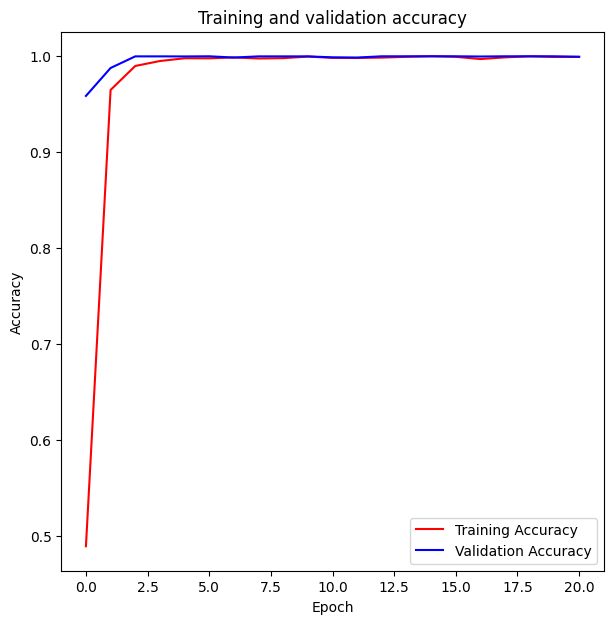

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(7,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

# Validation and Training loss plot<span id="6"></span>

Text(0.5, 1.0, 'Training and validation loss')

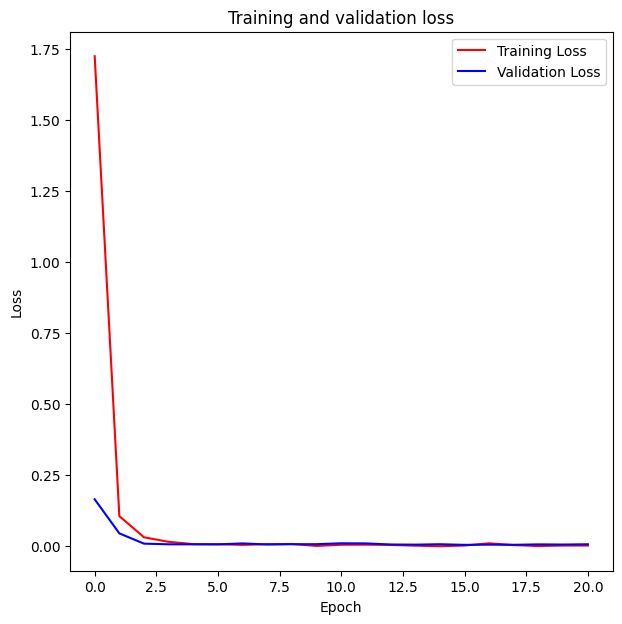

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# Prediction<span id="7"></span>

#### Finally predicting and checking the accuracy from the holdout data.

In [ ]:
predictions = model.predict(holdout_generator, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = holdout_generator.classes
class_labels = list(holdout_generator.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 578ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       200
           B       1.00      1.00      1.00       200
           C       1.00      1.00      1.00       200
           D       1.00      1.00      1.00       200
           E       1.00      1.00      1.00       200
           F       1.00      1.00      1.00       200
           G       1.00      1.00      1.00       200
           H       1.00      1.00      1.00       200
           I       1.00      1.00      1.00       200
           J       1.00      1.00      1.00       200
           K       1.00      1.00      1.00       200
           L       1.00      1.00      1.00       200
           M       1.00      1.00      1.00       200
           N       1.00      1.00      1.00       200
           O       1.00      1.00      1.00       200
           P       1.00      1.00      1.00       200
           Q       1.00      1.00      

#### Creating a visual to see if there are any misclassifications

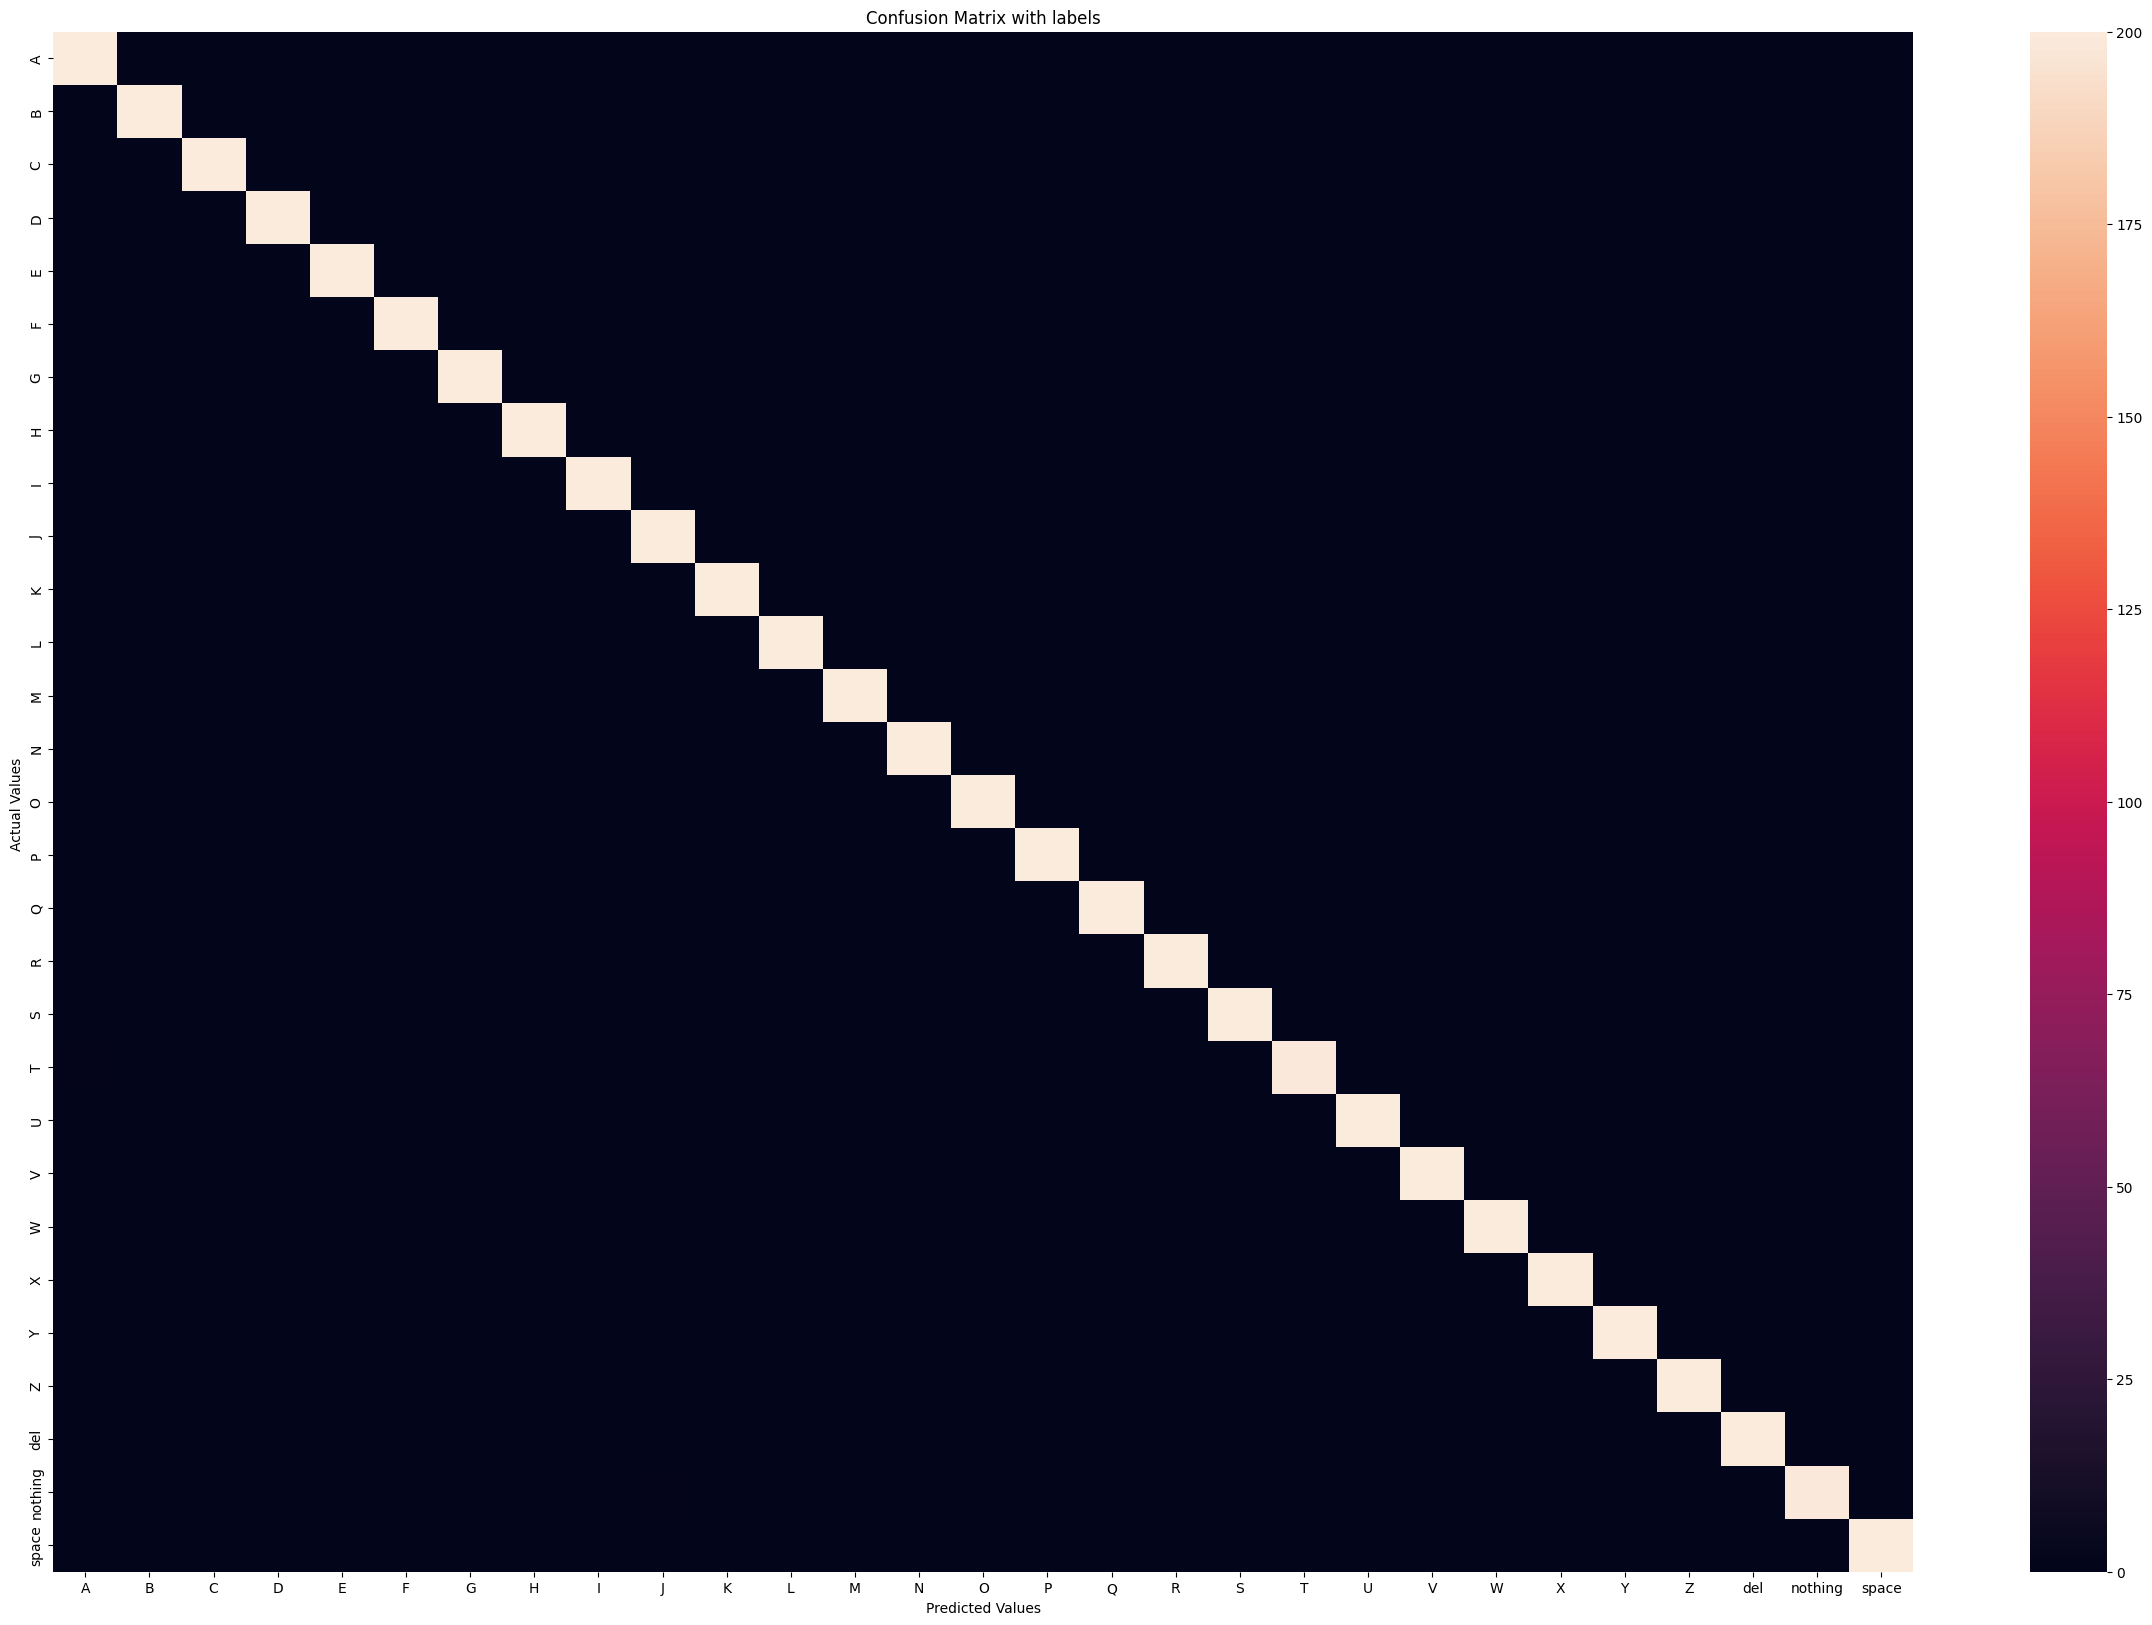

In [ ]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(true_classes,predicted_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

# Conclusion<span id="7"></span>

In [ ]:

final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation (Testing) Accuracy: {final_val_acc:.2f}%")


Final Training Accuracy: 99.92%
Final Validation (Testing) Accuracy: 99.94%
